In [1]:
import pandas as pd

df = pd.read_csv(r"covid-19.csv")

In [2]:
df.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [3]:
# check the data type of our date column
df.Date.dtype
#df.info()

dtype('O')

In [4]:
# create a new column, date_parsed, with the parsed dates
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")


In [5]:
df['Date'].dtype

dtype('<M8[ns]')

In [6]:
# get the day of the month from the date_parsed column
df['months'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
#df['months'] = df['Date'].dt.month

In [7]:
df.drop(['Date'],axis  = 1)

,Confirmed,Recovered,Deaths,Increase rate,months,day,year
0,555,28,17,NaN,1,22,2020
1,654,30,18,17.837838,1,23,2020
2,941,36,26,43.883792,1,24,2020
3,1434,39,42,52.391073,1,25,2020
4,2118,52,56,47.698745,1,26,2020
5,2927,61,82,38.196412,1,27,2020
6,5578,107,131,90.570550,1,28,2020
7,6166,126,133,10.541413,1,29,2020
8,8234,143,171,33.538761,1,30,2020
9,9927,222,213,20.561088,1,31,2020


In [9]:
import numpy as np
import re

#In re.sub(), specify a regular expression pattern in the first argument, a new string in the second argument,
#and a string to be processed in the third argument.
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [10]:
# Set datetime precision to 'day'
#df['Date'] =  df['Date'].astype('datetime64[D]')

##df['Increase rate'].plot(kind='line', grid=True, title='Rates, 2020')
#df.head()

In [11]:
add_datepart(df, 'Date')

In [12]:
df

,Confirmed,Recovered,Deaths,Increase rate,months,day,year,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
0,555,28,17,NaN,1,22,2020,2020,1,4,22,2,22,1579651200
1,654,30,18,17.837838,1,23,2020,2020,1,4,23,3,23,1579737600
2,941,36,26,43.883792,1,24,2020,2020,1,4,24,4,24,1579824000
3,1434,39,42,52.391073,1,25,2020,2020,1,4,25,5,25,1579910400
4,2118,52,56,47.698745,1,26,2020,2020,1,4,26,6,26,1579996800
5,2927,61,82,38.196412,1,27,2020,2020,1,5,27,0,27,1580083200
6,5578,107,131,90.570550,1,28,2020,2020,1,5,28,1,28,1580169600
7,6166,126,133,10.541413,1,29,2020,2020,1,5,29,2,29,1580256000
8,8234,143,171,33.538761,1,30,2020,2020,1,5,30,3,30,1580342400
9,9927,222,213,20.561088,1,31,2020,2020,1,5,31,4,31,1580428800


In [13]:
df.plot(x='Month', y='Deaths', kind='line')#style='o')

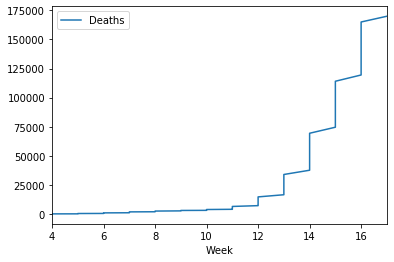

In [14]:
df.plot(x='Week', y = 'Deaths',kind = 'line')

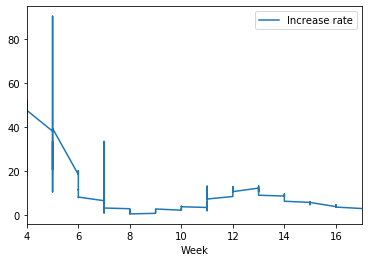

In [15]:
df.plot(x='Week', y = 'Increase rate',kind = 'line')

In [16]:
X = df.drop(['Elapsed','Increase rate'],axis = 1)
y = df['Increase rate']

In [55]:
from sklearn.feature_selection import SelectKBest,RFE
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor

#clf = SelectKBest(score_func=f_classif,k=6)
#fit1 = clf.fit(X,y)

#set_printoptions(precision =3)
#print(fit1.scores_)
#features = fit1.transform(X)
#print(features[:5,:])

#pca = PCA(n_components=4)
#fit = pca.fit(X)
#print(fit.whiten)
#print(fit.explained_variance_ratio_)
#print(fit.components_)

model = ExtraTreesRegressor(n_estimators=5)
model.fit(X, y)
print([i for i in model.feature_importances_ if i>0.1])

[0.10670360199411744, 0.287786257453886, 0.11690317449961271, 0.10854392659291875, 0.17896849275508106]


In [41]:
X[:5]

,Confirmed,Recovered,Deaths,months,day,year,Year,Month,Week,Day,Dayofweek,Dayofyear
0,555,28,17,1,22,2020,2020,1,4,22,2,22
1,654,30,18,1,23,2020,2020,1,4,23,3,23
2,941,36,26,1,24,2020,2020,1,4,24,4,24
3,1434,39,42,1,25,2020,2020,1,4,25,5,25
4,2118,52,56,1,26,2020,2020,1,4,26,6,26


In [17]:
df['Increase rate'].fillna((df['Increase rate'].mean()), inplace=True)


In [168]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'auto',max_depth = 10)
# Fit on training data
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [199]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("R^2 of the prediction",model_score)
y_predicted = model.predict([[1472258,645738,169985,2020,4]])
#[[1472258,645738,169985,2020,4,17,20,0,159]]
# The mean squared error
#print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
#print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R^2 of the prediction 0.9432873491679187


In [200]:
y_predicted 

array([4.55575194])

In [181]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['Increase rate'])
# Remove the labels from the features
# axis 1 refers to the columns
features = df.drop(['Increase rate','Elapsed'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [182]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Confirmed            Importance: 0.24
Variable: Deaths               Importance: 0.23
Variable: Month                Importance: 0.22
Variable: Recovered            Importance: 0.18
Variable: Year                 Importance: 0.13


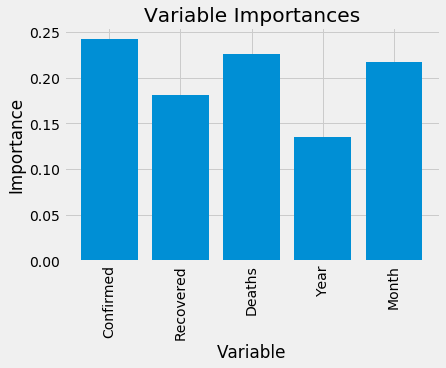

In [183]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [186]:
X=df[['Confirmed','Recovered','Deaths','Year','Month']]  
y=df['Increase rate']
df['Increase rate'].fillna((df['Increase rate'].mean()), inplace=True)


In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'auto',max_depth = 10,)
# Fit on training data
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [194]:
df.head()

,Confirmed,Recovered,Deaths,Increase rate,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
0,555,28,17,10.575147,2020,1,4,22,2,22,1579651200
1,654,30,18,17.837838,2020,1,4,23,3,23,1579737600
2,941,36,26,43.883792,2020,1,4,24,4,24,1579824000
3,1434,39,42,52.391073,2020,1,4,25,5,25,1579910400
4,2118,52,56,47.698745,2020,1,4,26,6,26,1579996800


In [197]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("R^2 of the prediction",model_score)


#X=df[['Confirmed','Recovered','Deaths','Year','Month']]  

y_predicted = model.predict([[15984726,519598,515984,2020,9]])

# The mean squared error
#print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
##print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R^2 of the prediction 0.9432873491679187


In [198]:
y_predicted

array([3.82856706])